<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/5_Track_2_Modeling_few_vars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Performing Initial Modeling:**
Modeling realtionships between key station characteristics and shifts in perception, specifically police sensitivity to women reported crimes, among survey responders from baseline to endline

Summarizing Approach Key Findings and Potential Next Steps Here:


**High Level Approach:**

*   Build 2 potential target variables (difference in sensitive score and flag denoting an increase in sensitivity score)
*   Keep variables exhibiting potential relationship with changes in sensitivity as predictors (station size, # of officers, urban vs rural designation)
*   Kept survey respondents with a non missing sensitivity score at baseline and end line.
*   Fit initial models at the individual person level with change in sensitivity as the target variable and station characterisitics as the predictors.

***Key Findings to Date***

* For model using the 'baseline' station characteristics as predictors: *

*   Model had very low fit statistics with R2 <= .02 but 2 station characteristics did have statistically significant parameter estimates (size of the station, i.e. number of employees and % of staff that were female both show a negative association with the change in police sensitivity over the study.

* For model using the 'endline' station characteristics as predictors: *

*   Model had very low fit statistics with R2 <= .01 (lower than the model with baseline data).  The "% of staff that were female" negative association with the change in police sensitivity was consistent with the 'baseline' model (but p-< value was higher ... no longer <.05.  Another variable ("total female staff") was significant and negatively associated with a difference in sensitivity.


***Next Steps***

*  To fully utilize the survey data, we will create 'station level' data set.  Since the predictors are all station characteristics, we'll create average sensitivity scores and differences at the station level (using groupby) and model at that level.

* Initial models are showing evidence that larger stations tend to have lower changes in sensitivity.


Import Required Libraries

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a special library for working with tables:
from tabulate import tabulate


### Reading in the data
The data is police_outer_person_data.csv (created in separate notebook "12 - Final_Project_Merging_Data_for_Q5_Analysis_ipynb")

In [ ]:
# the code below allows you to access your Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data file created in the Q5_data_prep notebook is located here
# contains an outer join of the baseline and full police survey data with the police personnel data appended to each row
inputfile1 = "/content/drive/My Drive/Colab Notebooks/Final Project/Data/police_outer_person_data.csv"


# Read the CSV file into a dataframes
police_person_data = pd.read_csv(inputfile1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initial Sample Records and Descriptive Stats of the Data


In [ ]:
# Use `head()` to get an overview of the first few records in the dataset
print ('Police Survey + Personnel Data Records')
police_person_data.head(5)

Police Survey + Personnel Data Records


,Unnamed: 0_x,b_uid,gender_x,b_pol_impt_x,b_thana_impt_x,b_wcase_x,b_effective_x,b_helpful_x,b_add_officer_x,b_add_female_x,...,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
2,125.0,2141762.0,m,0.0,0.0,enough attention,very effective,helpful,more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
3,121.0,2141764.0,m,0.0,0.0,too much attention,very effective,very helpful,much more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN


In [ ]:
# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",police_person_data.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_b_uid_keys = police_person_data['b_uid'].nunique()
distinct_uid_keys = police_person_data['uid'].nunique()
distinct_pscode_keys = police_person_data['ps_code'].nunique()

print("Distinct b_uid keys:", distinct_b_uid_keys)
print("Distinct uid keys:", distinct_uid_keys)
print("Distinct PS Code keys:", distinct_pscode_keys)

# Check Data Types of Columns in the Dataframe;

police_person_data.info(verbose=True)

Rows and Column Count, Police Survey + Personnel Data: (2843, 108)
Distinct b_uid keys: 1950
Distinct uid keys: 2032
Distinct PS Code keys: 180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 108 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    Unnamed: 0_x              float64
 1    b_uid                     float64
 2    gender_x                  object 
 3    b_pol_impt_x              float64
 4    b_thana_impt_x            float64
 5    b_wcase_x                 object 
 6    b_effective_x             object 
 7    b_helpful_x               object 
 8    b_add_officer_x           object 
 9    b_add_female_x            object 
 10   b_female_better_x         object 
 11   b_sensitivity_x           float64
 12   uid                       float64
 13   attrit                    float64
 14   ps_code_x                 float64
 15   population_x              float64
 16   urban_x               

The dataframe has b_uid for respondents and baseline and uid for respondents at endline. Police personnel data is duplicated across each record and is at the ps_code level.   Next, we limit the data to the percpetion and station characterisitic data columns required for EDA.

As a next step below,

1. limit the responsder data to responders who responded at both baseline and endline.

2.  Create 2 potential target variables for modeling including change if sensitivity from baseline to endline (absolute difference in sensitivity score) and the % incidence of female employees at the station level (for use as a predictor variable.

In [ ]:
# New dataframe with only those records containing survey responders at baseline and endline


q5_model_both_df = police_person_data.dropna(subset=['b_uid','uid'])

# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",q5_model_both_df.shape)

# Creating New Columns with difference in baseline to endline sensitivity scores and flag denoting increase in scores from baseline to endline;

q5_model_both_df['sensitivity_diff'] = q5_model_both_df['e_sensitivity'] - q5_model_both_df['b_sensitivity_x']

q5_model_both_df['sensitivity_inc'] = (q5_model_both_df['e_sensitivity'] - q5_model_both_df['b_sensitivity_x']) > 0

# Creating New Columns with Ratio of Female Employees to Total Employees;

q5_model_both_df['b_female_employee_ratio'] = (q5_model_both_df['b_female_staff'] / q5_model_both_df['b_total_staff'])

q5_model_both_df['e_female_employee_ratio'] = (q5_model_both_df['e_female_staff'] / q5_model_both_df['e_total_staff'])


Rows and Column Count, Police Survey + Personnel Data: (1139, 108)


<ipython-input-5-d80c2be8fb1b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_model_both_df['sensitivity_diff'] = q5_model_both_df['e_sensitivity'] - q5_model_both_df['b_sensitivity_x']
<ipython-input-5-d80c2be8fb1b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_model_both_df['sensitivity_inc'] = (q5_model_both_df['e_sensitivity'] - q5_model_both_df['b_sensitivity_x']) > 0
<ipython-input-5-d80c2be8fb1b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Next step:  Further reduce dataframe to columns used for modeling.

In [ ]:
# Create a new dataframe keeping on the key attributes for the modeling analysis:  police perception data at baseline and endline + police station characteristics.

# Based on the EDA police station employee count, number of officers, urban vs rural showed some relationship with changes in police perceptions from baseline to endline
# Changes in sensitivity are defined by 2 fields at the survey responder level -> difference in sensitivity scores from baseline to endline and a flag denoting an increase in sensitivity score

# Sensitivity Attributes to keep as dependent variables in the models  -> 'sensitivity_diff' , 'sensitivity_inc', 'b_sensitivity_x', 'e_sensitivity'
# Police Station characteristics to keep as predictors / features in the model -> 'population','urban','treatment', 'b_total_staff','b_female_staff','b_total_officers', 'e_total_staff','e_female_staff','e_total_officers'
# ids to keep > 'b_uid,'  'uid' , 'ps_code', 'attrit'

atts_to_keep = ['b_uid' , 'uid' , 'ps_code', 'attrit', 'population','urban','treatment', 'b_total_staff','b_female_staff','b_total_officers', 'e_total_staff','e_female_staff','e_total_officers','sensitivity_diff' , 'sensitivity_inc', 'b_sensitivity_x', 'e_sensitivity', 'b_female_employee_ratio', 'e_female_employee_ratio' ]

# New Dataframe Creation.

q5_model_both_df = q5_model_both_df[atts_to_keep]

# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",q5_model_both_df.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_b_uid_keys = q5_model_both_df['b_uid'].nunique()
distinct_uid_keys = q5_model_both_df['uid'].nunique()
distinct_pscode_keys = q5_model_both_df['ps_code'].nunique()

print("Distinct b_uid keys:", distinct_b_uid_keys)
print("Distinct uid keys:", distinct_uid_keys)
print("Distinct PS Code keys:", distinct_pscode_keys)

# Check Data Types of Columns in the Dataframe;

q5_model_both_df.info(verbose=True)

Rows and Column Count, Police Survey + Personnel Data: (1139, 19)
Distinct b_uid keys: 1139
Distinct uid keys: 1139
Distinct PS Code keys: 180
<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 2 to 2031
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   b_uid                    1139 non-null   float64
 1   uid                      1139 non-null   float64
 2   ps_code                  1139 non-null   float64
 3   attrit                   1139 non-null   float64
 4   population               1139 non-null   int64  
 5   urban                    1139 non-null   object 
 6   treatment                1139 non-null   object 
 7   b_total_staff            1139 non-null   float64
 8   b_female_staff           1139 non-null   float64
 9   b_total_officers         1139 non-null   float64
 10  e_total_staff            1139 non-null   float64
 11  e_female_staff           1139 non-null   float64

Dataframe now contains the police survey perception data at baseline ("b_ columns), at endline ("e_" attributes) and police station characteristics including urban flag, surrounding population size served, and staff size and gender composition

In [ ]:
# For numeric columns (the default selection), round to 2 decimal places for better readability.
numeric_summary_stats = q5_model_both_df.describe().round(2)
# Print the numeric summaries:
print("Numeric Summary Statistics: (vertical)")
display(numeric_summary_stats)

# For categorical columns, include 'object' (strings), 'category', and 'bool' (true/false) types.
print("\nCategorical Summary Statistics: (vertical)")
categorical_summary_stats = q5_model_both_df.describe(include = ['object', 'category', 'bool'])
# Print the categorical summaries:
display(categorical_summary_stats)

# Transpose the summary statistics tables (turn them sideways) to make them more readable, using .T
numeric_summary_stats_transposed = numeric_summary_stats.T
categorical_summary_stats_transposed = categorical_summary_stats.T

# Display the transposed summary statistics
print("\nNumeric Summary Statistics: (transposed)")
display(numeric_summary_stats_transposed)

print("\nCategorical Summary Statistics: (transposed)")
display(categorical_summary_stats_transposed)

Numeric Summary Statistics: (vertical)


,b_uid,uid,ps_code,attrit,population,b_total_staff,b_female_staff,b_total_officers,e_total_staff,e_female_staff,e_total_officers,sensitivity_diff,b_sensitivity_x,e_sensitivity,b_female_employee_ratio,e_female_employee_ratio
count,1139.00,1139.00,1139.00,1139.0,1139.00,1139.00,1139.00,1139.00,1139.00,1139.00,1139.00,1064.00,1135.00,1068.00,1139.00,1139.00
mean,2601040.64,2601023.96,5610.62,0.0,132631.58,47.06,3.19,9.81,55.85,5.31,10.48,0.39,7.12,7.49,0.07,0.10
std,297850.37,297854.78,3023.43,0.0,84034.88,21.46,2.03,5.30,23.97,3.02,5.01,3.33,2.47,2.51,0.04,0.04
min,2141762.00,2141733.00,1001.00,0.0,23565.00,9.00,0.00,0.00,17.00,0.00,2.00,-12.00,1.00,0.00,0.00,0.00
25%,2353568.00,2353639.50,3041.00,0.0,80000.00,27.00,2.00,6.00,35.00,3.00,7.00,-2.00,5.00,6.00,0.04,0.07
50%,2551564.00,2551635.00,5086.00,0.0,112312.00,46.00,3.00,9.00,55.00,5.00,10.00,0.00,7.00,7.00,0.07,0.09
75%,2753671.00,2753741.50,7130.00,0.0,154026.00,65.00,4.00,14.00,75.00,7.00,13.00,2.00,9.00,9.00,0.09,0.12
max,3257271.00,3257341.00,12180.00,0.0,545000.00,95.00,10.00,25.00,125.00,15.00,26.00,10.00,16.00,19.00,0.18,0.25



Categorical Summary Statistics: (vertical)


,urban,treatment,sensitivity_inc
count,1139,1139,1139
unique,2,2,2
top,Rural,Treatment,False
freq,602,776,633



Numeric Summary Statistics: (transposed)


,count,mean,std,min,25%,50%,75%,max
b_uid,1139.0,2601040.64,297850.37,2141762.0,2353568.00,2551564.00,2753671.00,3257271.00
uid,1139.0,2601023.96,297854.78,2141733.0,2353639.50,2551635.00,2753741.50,3257341.00
ps_code,1139.0,5610.62,3023.43,1001.0,3041.00,5086.00,7130.00,12180.00
attrit,1139.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
population,1139.0,132631.58,84034.88,23565.0,80000.00,112312.00,154026.00,545000.00
b_total_staff,1139.0,47.06,21.46,9.0,27.00,46.00,65.00,95.00
b_female_staff,1139.0,3.19,2.03,0.0,2.00,3.00,4.00,10.00
b_total_officers,1139.0,9.81,5.30,0.0,6.00,9.00,14.00,25.00
e_total_staff,1139.0,55.85,23.97,17.0,35.00,55.00,75.00,125.00
e_female_staff,1139.0,5.31,3.02,0.0,3.00,5.00,7.00,15.00



Categorical Summary Statistics: (transposed)


,count,unique,top,freq
urban,1139,2,Rural,602
treatment,1139,2,Treatment,776
sensitivity_inc,1139,2,False,633


For First Model Fit:  Only Keep Records with non-missing sensitivity difference and convert the urban/rural field to dummy (1/0) variables for model fitting.

In [ ]:
# Dropping Records with NaN in sensitivity_diff field

q5_model_both_df=q5_model_both_df.dropna(subset=['sensitivity_diff'])

# Converting categorical variables to dummy variables

q5_model_both_df = pd.get_dummies(q5_model_both_df, dtype=int)

q5_model_both_df.head()

,b_uid,uid,ps_code,attrit,population,b_total_staff,b_female_staff,b_total_officers,e_total_staff,e_female_staff,...,sensitivity_diff,sensitivity_inc,b_sensitivity_x,e_sensitivity,b_female_employee_ratio,e_female_employee_ratio,urban_Rural,urban_Urban,treatment_Control,treatment_Treatment
2,2141762.0,2141733.0,2011.0,0.0,58432,24.0,0.0,7.0,43.0,3.0,...,0.0,False,8.0,8.0,0.0,0.069767,1,0,0,1
3,2141764.0,2141734.0,2011.0,0.0,58432,24.0,0.0,7.0,43.0,3.0,...,1.0,True,8.0,9.0,0.0,0.069767,1,0,0,1
6,2141770.0,2141737.0,2011.0,0.0,58432,24.0,0.0,7.0,43.0,3.0,...,2.0,True,7.0,9.0,0.0,0.069767,1,0,0,1
7,2141771.0,2141738.0,2011.0,0.0,58432,24.0,0.0,7.0,43.0,3.0,...,2.0,True,6.0,8.0,0.0,0.069767,1,0,0,1
8,2141765.0,2141739.0,2011.0,0.0,58432,24.0,0.0,7.0,43.0,3.0,...,2.0,True,5.0,7.0,0.0,0.069767,1,0,0,1


First Model:  Fit using the "baseline" timeperiod characteristics

In [ ]:
# Create X containing Baseline Predictor Variables

X = q5_model_both_df[['b_total_staff','b_female_employee_ratio','urban_Urban','treatment_Treatment']]

X.head()

,b_total_staff,b_female_employee_ratio,urban_Urban,treatment_Treatment
2,24.0,0.0,0,1
3,24.0,0.0,0,1
6,24.0,0.0,0,1
7,24.0,0.0,0,1
8,24.0,0.0,0,1


First Model:  Scale the predictor variables before fitting the linear model.

Set the predictor variable list to the dataframe X.

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['b_total_staff','b_female_employee_ratio','urban_Urban','treatment_Treatment']

X.head()

,b_total_staff,b_female_employee_ratio,urban_Urban,treatment_Treatment
0,-1.085448,-1.797784,-0.95586,0.680844
1,-1.085448,-1.797784,-0.95586,0.680844
2,-1.085448,-1.797784,-0.95586,0.680844
3,-1.085448,-1.797784,-0.95586,0.680844
4,-1.085448,-1.797784,-0.95586,0.680844


Set Sensitivity_Diff to dataframe y.

In [ ]:
y = q5_model_both_df['sensitivity_diff']

Execute test/ learn / fitting split steps from sklearn.

In [ ]:
# import the function train_test_split from the model_selection module of scikit_learn
from sklearn.model_selection import train_test_split

In [ ]:
# use list unpacking to assign the return values from train_test_split
# to variables. Nw we can train the model with x_train and y_train and then
# test with x_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2001)

In [ ]:
# import LinearRegression from the linear_model module in scikit-learn
from sklearn.linear_model import LinearRegression

# make an instance of LinearRegression
model = LinearRegression()

# train the model using fit
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# call predict on the test data to generate a set of predictions
predictions = model.predict(X_test)

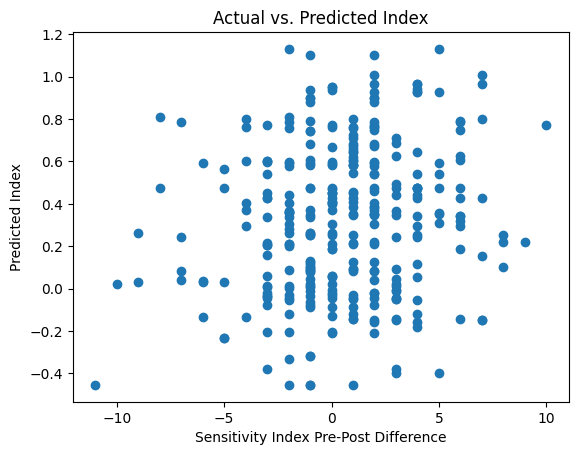

In [ ]:
# make a scatter plot to compare the actual prices vs. the predicted prices
_ = plt.scatter(y_test, predictions)
_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

A directional, but not precise, relationship appears.

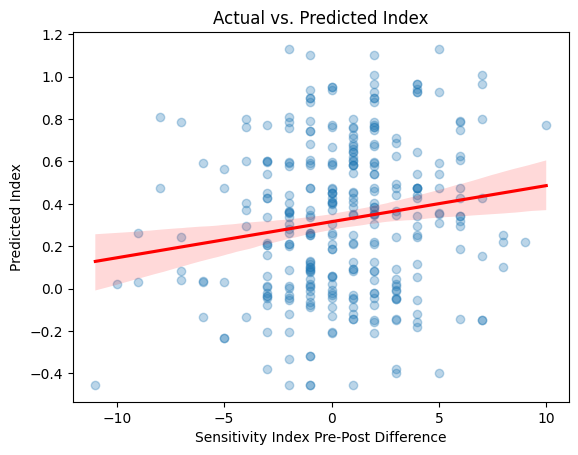

In [ ]:
_ = sns.regplot(x=y_test,
                y=predictions,
                scatter_kws={'alpha':0.3},  # make the scatter points have some transparency
                line_kws={'color':'red'})   # change regression line color

_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

Positive assocation does appear between actuals and predicted.  Appears that the predicted difference is much more concentrated (much less spread) than what is observed in the actuals.   Need to research typical causes of this ....

In [ ]:
# compute R-squared for our regression model using r2-score()
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)


0.019528774120860626


Very low R2 and less than 0.02.

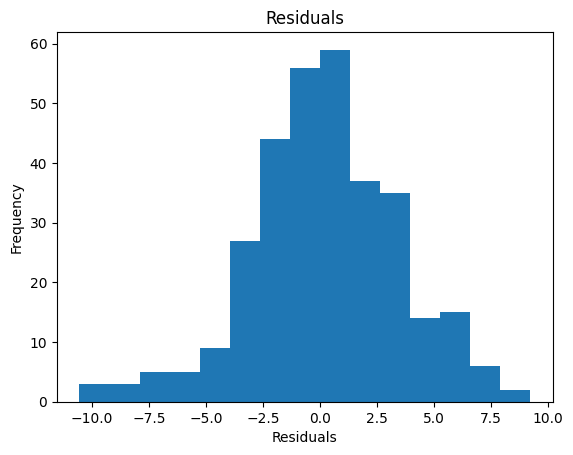

In [ ]:
_ = plt.hist(y_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

Good normal distribution of residuals with the highest count being centered on zero.

In [ ]:
# first import the metrics module
from sklearn import metrics

# then call the mean_absolute_error function
mae = metrics.mean_absolute_error(y_test, predictions)

# call mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)

# root mean squared error is the square root of mean_squared_error
# you could do that by hand or call metrics.root_mean_squared_error()
rmse = metrics.root_mean_squared_error(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 2.540434340723606
MSE: 10.895333298952892
RMSE: 3.3008079766858436


Found and executed code to generate OLS output to examine paramater estimates and p values.  Need to figure out how to execute this on the 'training' data vs.  all observations.

In [ ]:
import statsmodels.api as sm

X = X.reset_index(drop=True)  # Reset index of X and drop the old index
y = y.reset_index(drop=True)  # Reset index of y and drop the old index

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       sensitivity_diff   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              4.488
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                     0.00134
Time:                        18:02:15   Log-Likelihood:                         -2786.6
No. Observations:                1064   AIC:                                      5581.
Df Residuals:                    1060   BIC:                                      5601.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

2 of the predictor attributes are showing p values < .05  (total staff at baseline and % female employees at baseline).  Both have a negative correlation with changes in sensitivity.   Next block of code executes the same model but for the endline attributes -> to see if the relationship holds with the same type of station characteristics collected at endline.  

In [ ]:
# Create X containing Baseline Predictor Variables
# Now Using the Endline Variables

X2 = q5_model_both_df[['e_total_staff','e_female_employee_ratio','urban_Urban','treatment_Treatment']]

X2.head()

,e_total_staff,e_female_employee_ratio,urban_Urban,treatment_Treatment
2,43.0,0.069767,0,1
3,43.0,0.069767,0,1
6,43.0,0.069767,0,1
7,43.0,0.069767,0,1
8,43.0,0.069767,0,1


Scaling the predictor variable attributes ... this time using 'endline' characteristics.

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2))
X2.columns = ['e_total_staff','e_female_employee_ratio','urban_Urban','treatment_Treatment']

X2.head()

,e_total_staff,e_female_employee_ratio,urban_Urban,treatment_Treatment
0,-0.544624,-0.5894,-0.95586,0.680844
1,-0.544624,-0.5894,-0.95586,0.680844
2,-0.544624,-0.5894,-0.95586,0.680844
3,-0.544624,-0.5894,-0.95586,0.680844
4,-0.544624,-0.5894,-0.95586,0.680844


Running Sklearn linear regression routines (renaming predictor and target variables to y2 and X2.

In [ ]:
y2 = q5_model_both_df['sensitivity_diff']

In [ ]:
# use list unpacking to assign the return values from train_test_split
# to variables. Nw we can train the model with x_train and y_train and then
# test with x_test and y_test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2001)

In [ ]:
# import LinearRegression from the linear_model module in scikit-learn
from sklearn.linear_model import LinearRegression

# make an instance of LinearRegression
model = LinearRegression()

# train the model using fit
model.fit(X2_train, y2_train)


LinearRegression()

In [ ]:
# call predict on the test data to generate a set of predictions
predictions = model.predict(X2_test)

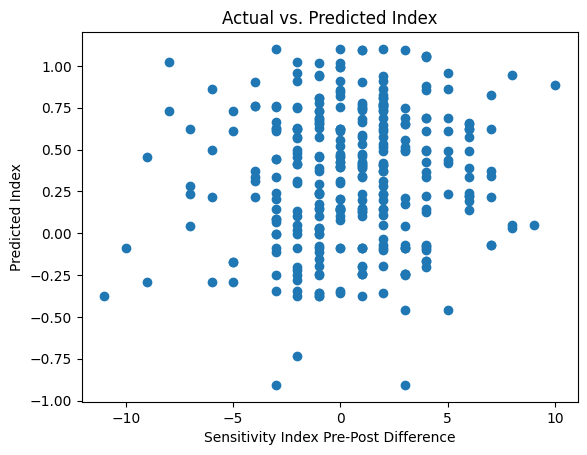

In [ ]:
# make a scatter plot to compare the actual prices vs. the predicted prices
_ = plt.scatter(y2_test, predictions)
_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

Slight positive relationship between predicted and actuals (appears less correlated than the baseline model)

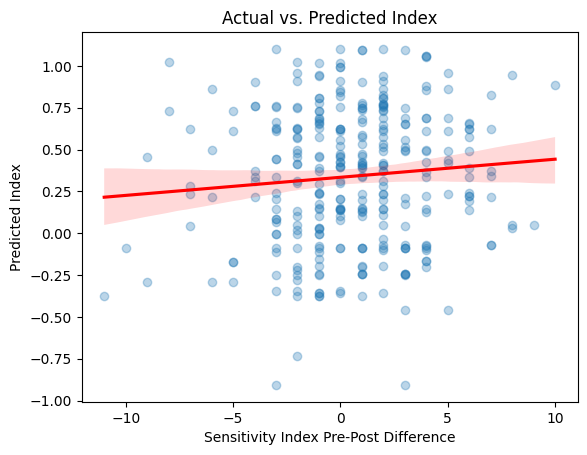

In [ ]:
_ = sns.regplot(x=y2_test,
                y=predictions,
                scatter_kws={'alpha':0.3},  # make the scatter points have some transparency
                line_kws={'color':'red'})   # change regression line color

_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

Slight positive relationship confirmed (but line is pretty flat).

In [ ]:
# compute R-squared for our regression model using r2-score()
from sklearn.metrics import r2_score
r2_2 = r2_score(y2_test, predictions)
print(r2_2)

0.004235714336275231


VERY LOW R2.

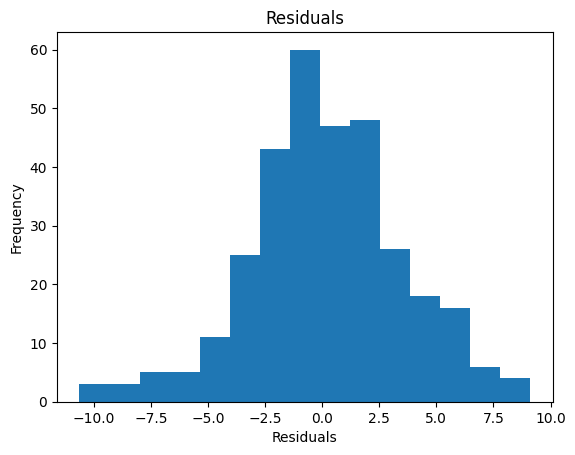

In [ ]:
_ = plt.hist(y2_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

Good concentration of residuals around 0.

In [ ]:
# first import the metrics module
from sklearn import metrics

# then call the mean_absolute_error function
mae = metrics.mean_absolute_error(y2_test, predictions)

# call mean_squared_error
mse = metrics.mean_squared_error(y2_test, predictions)

# root mean squared error is the square root of mean_squared_error
# you could do that by hand or call metrics.root_mean_squared_error()
rmse = metrics.root_mean_squared_error(y2_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 2.5683441442092048
MSE: 11.065275036268506
RMSE: 3.3264508167517683


In [ ]:
import statsmodels.api as sm

X2 = X2.reset_index(drop=True)  # Reset index of X and drop the old index
y2 = y2.reset_index(drop=True)  # Reset index of y and drop the old index

#add constant to predictor variables
x2 = sm.add_constant(X2)

#fit linear regression model
model = sm.OLS(y2, X2).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       sensitivity_diff   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              3.627
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                     0.00606
Time:                        18:02:18   Log-Likelihood:                         -2788.3
No. Observations:                1064   AIC:                                      5585.
Df Residuals:                    1060   BIC:                                      5604.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Consistency in the significance and direction (negative) for the % of staff that is female.   But the total_staff at endline is no longer significant and sign/direction of relationship switched.